# Large Language Model - GPT3
## 학습 목표
1. 대표적인 LLM인 GPT3 모델을 활용해 본다.
2. OpenAI API 사용 방법을 터득한다.
3. In-context learning을 활용한 LLM 활용 방안을 확인한다.

**context**
1. OpenAI API 소개
2. OpenAI Completion 호출하기
3. In-context learning을 활용하기

## OpenAI API 소개
GPT3를 개발한 OpenAI의 각종 언어 모델은 [OpenAI Playground](https://platform.openai.com/playground)에서 간단히 활용해 볼 수 있으며, 상용 서비스에 활용할 수 있게끔 [API](https://openai.com/blog/openai-api)를 열어두었다.
다만, 상용 서비스인 만큼 [토큰당 가격](https://openai.com/pricing)이 존재한다. 아래 표는 2024년 2월 12일 기준 가격이다.

| 모델 | 세부 모델 |  최대 길이 (토큰) | 입력 (1k 토큰 당) | 출력 (1k 토큰 당) |
|--|--|--|--|--|
| GPT3   | davinci-002 | 16k  | \$0.002  | \$0.002 |
| GPT3.5 | instruct    | 4k   | \$0.0015 | \$0.002 |
|        | turbo       | 16k  | \$0.0005  | \$0.0015 |
| GPT4   |             | 8k   | \$0.03   | \$0.06  |
|        |             | 32k  | \$0.06   | \$0.12  |
|        | turbo       | 128k | \$0.01   | \$0.03  |

[GPT의 토큰화기](https://github.com/openai/tiktoken)에서 1k 토큰은 대략 750 영어단어 정도이며, [데모 사이트](https://platform.openai.com/tokenizer)에서 입력한 텍스트에 대한 토큰 수를 측정할 수 있다. 예를 들어 가격표 위 문단은 125 토큰으로 이루어져 있다.

OpenAI 모델들은 일정 금액까지는 무료 사용이 존재하며, 자신의 계정 페이지에서 [현재 사용 가능 금액](https://platform.openai.com/account/usage)을 볼 수 있다.
금액 제한에 도달하면 다음과 같은 오류가 발생한다.
```
You exceeded your current quota, please check your plan and billing details.
```
무료 사용 금액은 전화번호 단위로 할당된다.

OpenAI 모델을 API로 호출하기 위해서 [API 키를 발급](https://platform.openai.com/account/api-keys)받아야 하며, 발급받은 API 키를 제시하여 모델을 사용하는 것이 가능하다.

본 실습에선 GPT3 모델인 davinci-002를 사용한다.

> GPT3 vs ChatGPT

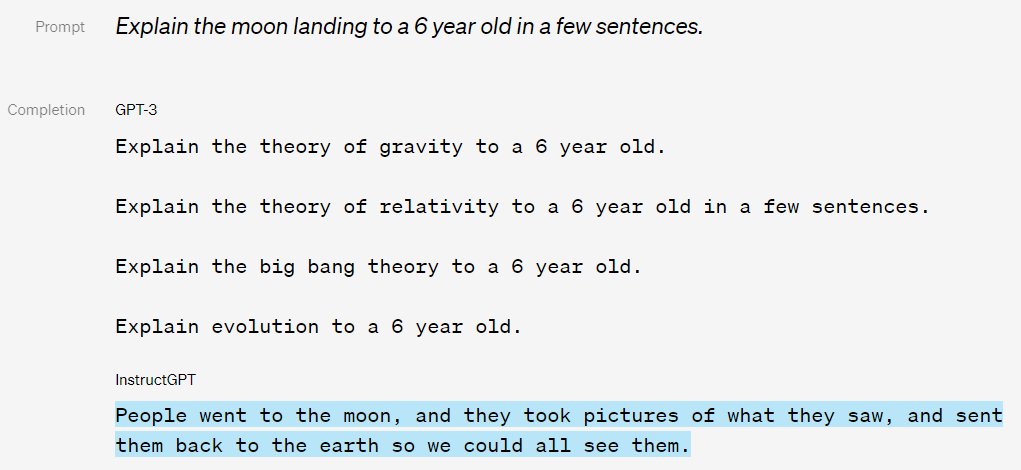

우리가 흔히 알고 있는 ChatGPT와 GPT3는 엄밀하게 정의하자면 다른 모델이다.

GPT3는 수많은 텍스트 데이터에 대해서 다음 토큰을 예측하는 Causal language modeling을 통해 사전 학습한 모델을 의미한다. 즉 몇 개의 토큰이 주어졌을때 다음 토큰들을 생성하는 능력은 뛰어나지만, 인간의 명령(Instruction)을 따르도록 별도의 학습이 되어있지 않다.

반면 ChatGPT는 모델이 인간의 명령을 따르고 좋은 품질의 답변을 생성하기 위해 Instruction Tuning, Human Preference Tuning과 같은 학습들이 추가로 적용된 모델이다. Instruction Tuning과 Human Preference Tuning은 앞으로 이어질 실습에서 다룰 예정이다.

> Completion API vs Chat API

Completion API는 의미 그대로 문장을 "완성"하기 위한 API이다. 즉 문자열 *Seoul is the capital city of* 을 모델에게 전달하면, 모델은 디코딩 전략에 따라 다음 토큰들을 생성하며 문장을 완성한다.

Chat API는 Assistant(언어 모델)와 User(사용자)의 대화에 중점을 두는 API이며, 3가지의 role(*System*, *Assistant*, *User*)을 통해 텍스트를 입력할 수 있다. 또한 이전 대화 내용을 기반으로 양질의 답변을 기대할 수 있다.

본 실습에선 Completion API를 사용한다.

In [ ]:
# 서버에 직접 https 요청을 보내서 모델을 호출하는 방식
%%bash
export "API KEY를 입력해 주세요."
curl https://api.openai.com/v1/completions \
    -H "Content-Type: application/json" \
    -H "Authorization: Bearer $API_KEY" \
    -d '{"model": "davinci-002", "prompt": "Seoul is the capital city of"}'

{
  "id": "cmpl-8zIGZlUHxBuFqJg0sJNN1H7aAJFbY",
  "object": "text_completion",
  "created": 1709618915,
  "model": "davinci-002",
  "choices": [
    {
      "text": " Korea and it contains many of the \"State-Duty-Free\" shops, however",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 7,
    "completion_tokens": 16,
    "total_tokens": 23
  }
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   484  100   418  100    66    649    102 --:--:-- --:--:-- --:--:--   751


OpenAI에서 API로 [사용할 수 있는 모델](https://platform.openai.com/docs/models)은 다음과 같다.
* GPT-3 (GPT base, davinci-002)
* GPT-3.5 (Turbo, Instruct)
* GPT-4

무/유료 사용 모두 [호출 회수 및 생성 토큰 개수에 제한](https://platform.openai.com/docs/guides/rate-limits)이 있으며, [자신의 계정 페이지](https://platform.openai.com/account/rate-limits)에서 현재 적용된 제한선을 확인할 수 있다.

Tier별로 제한선이 정해져 있으며, Free tier의 제한선이 가장 높고 Tier5의 제한선이 가장 낮다.

호출 및 토큰 개수 제한에 도달하면 다음과 같은 오류가 발생한다.
```
Rate limit reached for default-text-davinci-002 in organization org-{id} on requests per min. Limit: 20.000000 / min. Current: 24.000000 / min.
```

앞선 본 형태처럼 서버에 직접 https 요청을 보내서 모델을 호출할 수도 있지만, OpenAI에서 제공하는 파이썬 패키지를 활용하면 파이썬에서 쉽게 사용이 가능하다.

In [1]:
! pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI

# api_key를 입력하여 객체를 생성한다.
client = OpenAI(
    api_key="API KEY를 입력해주세요."
)


In [ ]:
# 사용할 모델(davinci-002)과 프롬프트를 입력한다.
client.completions.create(model="davinci-002", prompt="Seoul is the capital city of")

Completion(id='cmpl-8zIGvdguRfUWJOAc5JXQNT1Ez5gGJ', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text=' South Korea, with a population of about 10 million. It lies in the')], created=1709618937, model='davinci-002', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=7, total_tokens=23))

## OpenAI Completion 호출하기
OpenAI의 Completion API는 생성을 위하여 [다양한 옵션](https://platform.openai.com/docs/api-reference/completions/create)들을 제공한다.

* model: `Required`, 사용할 모델 이름
* prompt: `Required`, 입력 프롬프트
* best_of: 생성할 후보 개수 (`Default`: 1)
* n: 반환할 후보 개수. best_of보다 작거나 같아야 한다. (`Default`: 1)
* max_tokens: 최대 생성 토큰 개수 (`Default`: 16)
* stop: 생성 중단 텍스트. 나오면 생성을 그만둔다. (포함하지 않는다)
* temperature: 다양성 조절 (`Default`: 1)
* top_p: temparture와 같이 조정하지 않는 것을 권장 (`Default`: 1)

In [ ]:
response = client.completions.create(
    model="davinci-002",
    prompt="Seoul is the captial city of",
    best_of=5,
    n=3,
    max_tokens=30,
    stop="\n",
    temperature=0.8
)

In [ ]:
response

Completion(id='cmpl-8zIH1MM7313oiClN9U20chrj9aljf', choices=[CompletionChoice(finish_reason='stop', index=0, logprobs=None, text=' South Korea'), CompletionChoice(finish_reason='length', index=1, logprobs=None, text=' South Korea. It is one of the largest and most populous cities in the world with a population of 10.4 million. Seoul is a high'), CompletionChoice(finish_reason='length', index=2, logprobs=None, text=' South Korea and is the largest city in the world with a population of over 20 million people. Seoul has a rich history going back almost 600')], created=1709618943, model='davinci-002', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=114, prompt_tokens=8, total_tokens=122))

In [ ]:
response.choices[0]

CompletionChoice(finish_reason='stop', index=0, logprobs=None, text=' South Korea')

In [ ]:
response.choices[1]

CompletionChoice(finish_reason='length', index=1, logprobs=None, text=' South Korea. It is one of the largest and most populous cities in the world with a population of 10.4 million. Seoul is a high')

In [ ]:
response.choices[2]

CompletionChoice(finish_reason='length', index=2, logprobs=None, text=' South Korea and is the largest city in the world with a population of over 20 million people. Seoul has a rich history going back almost 600')

Completion API는 다음과 같은 내용을 포함한 [Completion object](https://platform.openai.com/docs/api-reference/completions/object)를 반환한다.
* choices: 생성된 결과. `n`만큼의 결과가 포함되어 있다.
  * finish_reason: 생성이 중단된 이유. 길이 제한에 걸렸다면 `length`, Stop 단어에 걸렸다면 해당 단어가 나온다.
  * text: 생성된 결과
* created: 생성된 시각
* id: 해당 Completion의 고유한 id
* model: 사용한 모델
* usage: 사용량
  * completion_tokens: 생성된 토큰 개수. 출력 토큰에 해당한다.
  * prompt_tokens: 프롬프트에 사용된 토큰 개수. 입력 토큰에 해당한다.
  * total_tokens: 사용된 총 토큰 개수

Completion object는 파이썬 객체처럼 쉽게 접근이 가능하다.

In [ ]:
response = client.completions.create(model="davinci-002", prompt="Seoul is the capital city of")
print(response.choices[0].text)

 South Korea. Around 10 million people live here.

5. New York,


앞서 다룬 것처럼 Openai API는 유/무료 모두 호출 횟수 제한이 있다. 이에 따라 API 호출 시 에러가 발생할 수 있다. 이러한 에러를 다루기 위하여 OpenAI에서는 에러 발생 시 [잠시 기다렸다가 다시 시도하는 것](https://platform.openai.com/docs/guides/rate-limits/error-mitigation)을 권장하고 있다. 이러한 처리를 쉽게 작성하기 위하여 [Tenacity](https://tenacity.readthedocs.io/en/latest/) 라이브러리를 사용해 볼 수 있다.

In [ ]:
! pip install tenacity

In [ ]:
from tenacity import (
    retry,
    wait_fixed,
    stop_after_attempt,
)

# wait_fixed(3) : 각 시도마다 3초를 기다린다.
# stop_after_attempt(5) : 최대 5번까지만 시도한다.
@retry(wait=wait_fixed(3), stop=stop_after_attempt(5))
def completion(prompt, **kwargs):
    return client.completions.create(
        model="davinci-002",
        prompt=prompt,
        **kwargs
    ).choices[0].text

In [ ]:
completion("Seoul is the capital city of")

' South Korea. It is a bustling metropolis of nearly 10 million people.'

## In-context learning 활용하기
> In-context learning

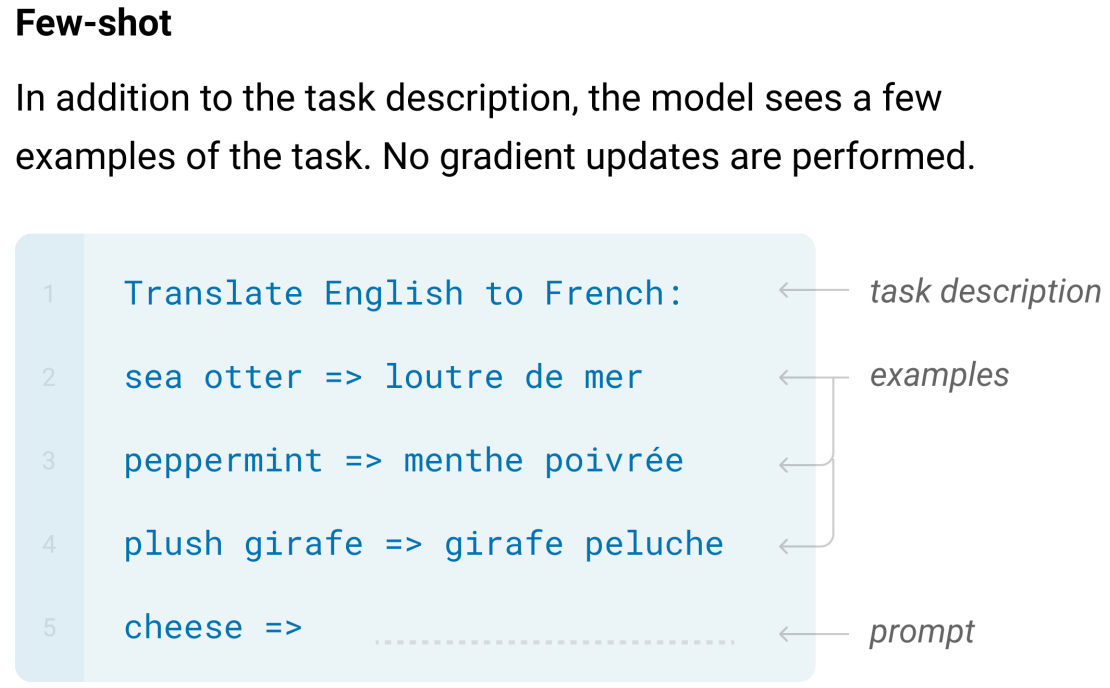

In-context learning이란, 모델의 추론만으로 특정 태스크를 수행하는 방법론을 의미한다.

일반적으로 {Instruction, In-context example, Test input}으로 구성되며, In-context example의 개수에 따라 Zero-shot, Few-shot 등으로 구분된다.

In [ ]:
# 번역 태스크
zero_shot = """\
Translate English to Korean:
I like playing soccer =>\
"""

one_shot = """\
Translate English to Korean:
I go to school => 나는 학교에 갑니다
I like playing soccer =>\
"""

few_shot = """\
Translate English to Korean:
I go to school => 나는 학교에 갑니다
You must do your work => 너는 너의 일을 해야만 해
We don't know how it work => 우리는 그것이 어떻게 작동하는지 몰라
I like playing soccer =>\
"""

In [ ]:
print("Zero-shot:", completion(zero_shot, stop="\n"))
print("One-shot:", completion(one_shot, stop="\n"))
print("Few-shot:", completion(few_shot, stop="\n"))

Zero-shot:  football
One-shot:  난 축구를 좋아합니다
Few-shot:  나는 축구를 좋아합니다


In [ ]:
# 감정 분석 태스크
zero_shot = """\
Analyze the sentiment of a sentence. Labels={Positive, Negative}:
This movie is terrible. =>\
"""

one_shot = """\
Analyze the sentiment of a sentence. Labels={Positive, Negative}:
I don't like watching movies. => Negative
This movie is terrible. =>\
"""

few_shot = """\
Analyze the sentiment of a sentence. Labels={Positive, Negative}:
I don't like watching movies. => Negative
That restaurant was amazing. => Positive
Pizza is delicious. => Positive
This movie is terrible. =>\
"""

In [ ]:
print("Zero-shot:", completion(zero_shot, stop="\n"))
print("One-shot:", completion(one_shot, stop="\n"))
print("Few-shot:", completion(few_shot, stop="\n"))

Zero-shot:  Negative
One-shot:  Negative
Few-shot:  Negative


# Reference
1. Language Models are Few-Shot Learners (https://arxiv.org/abs/2005.14165)
2. https://openai.com/research/instruction-following#sample1